In [7]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
# Read in the data
train = pd.read_csv('train_users_2.csv', index_col=None, encoding='utf-8')
sessions = pd.read_csv('sessions.csv', index_col=None, encoding='utf-8')
countries = pd.read_csv('countries.csv', index_col=None, encoding='utf-8')
age_gender = pd.read_csv('age_gender_bkts.csv', index_col=None, encoding='utf-8')

In [9]:
# Look at the data
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [11]:
train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [12]:
# Look at some distributions
train['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

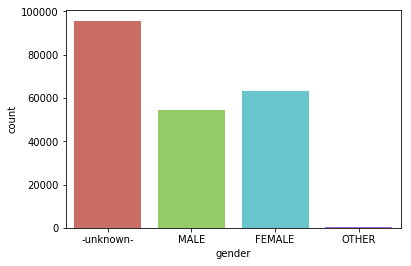

In [13]:
# Plot the distributions
sns.countplot(x='gender', data=train, palette='hls')
plt.show()

In [14]:
train['signup_method'].value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

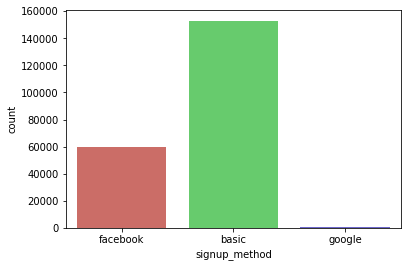

In [15]:
sns.countplot(x='signup_method', data=train, palette='hls')
plt.show()

In [16]:
train['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64

In [17]:
train['affiliate_channel'].value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

In [18]:
train['affiliate_provider'].value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [19]:
train['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [20]:
train['signup_app'].value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

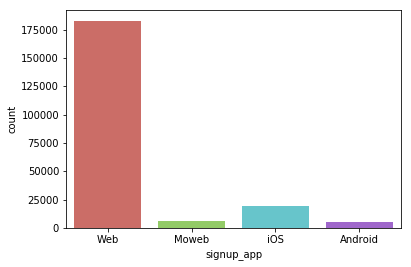

In [21]:
sns.countplot(x='signup_app', data=train, palette='hls')
plt.show()

In [22]:
train['first_device_type'].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [23]:
train['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
RockMelt                   24
SiteKiosk                  24
Iron                       17
IceWeasel                  13
Pale Moon                  12
CometBird                  11
SeaMonkey                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
Comodo Dra

In [91]:
# Target variable
train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [24]:
# Create functions to extract year, month, day and hour from timestamp variable
def get_year_from_timestamp(timestamp_var): 

    return {
        'year': timestamp_var.astype(str).str[:4].astype(int)
    }

In [25]:
def get_month_from_timestamp(timestamp_var): 

    return {
        'month': timestamp_var.astype(str).str[4:6].astype(int)
    }

In [26]:
def get_day_from_timestamp(timestamp_var): 

    return {
        'day': timestamp_var.astype(str).str[6:8].astype(int)
    }

In [27]:
def get_hour_from_timestamp(timestamp_var): 

    return {
        'hour': timestamp_var.astype(str).str[8:10].astype(int)
    }

In [28]:
# Create dictionaries for extracted variables
year_series_dict = get_year_from_timestamp(train.timestamp_first_active)
month_series_dict = get_month_from_timestamp(train.timestamp_first_active)
day_series_dict = get_day_from_timestamp(train.timestamp_first_active)
hour_series_dict = get_hour_from_timestamp(train.timestamp_first_active)

In [29]:
# Add new variables to the train dataframe
train['timestamp_first_active_year'] = year_series_dict['year']
train['timestamp_first_active_month'] = month_series_dict['month']
train['timestamp_first_active_day'] = day_series_dict['day']
train['timestamp_first_active_hour'] = hour_series_dict['hour']

In [30]:
# Create functions to extract year, month and day from a date variable
def get_year_from_date(date_var): 

    return {
        'year': date_var.astype(str).str[:4].astype(int)
    }

In [31]:
def get_month_from_date(date_var): 

    return {
        'month': date_var.astype(str).str[5:7].astype(int)
    }

In [32]:
def get_day_from_date(date_var): 

    return {
        'day': date_var.astype(str).str[8:10].astype(int)
    }

In [33]:
# Create dictionaries for extracted variables
year_series_dict = get_year_from_date(train.date_account_created)
month_series_dict = get_month_from_date(train.date_account_created)
day_series_dict = get_day_from_date(train.date_account_created)

In [34]:
# Add new variables to the train dataframe
train['date_account_created_year'] = year_series_dict['year']
train['date_account_created_month'] = month_series_dict['month']
train['date_account_created_day'] = day_series_dict['day']

In [35]:
# Create new indicator variable from 'date_first_booking'
train['date_first_booking_ind'] = (train['date_first_booking'].notnull()).astype(int)

In [36]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser,country_destination,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,timestamp_first_active_hour,date_account_created_year,date_account_created_month,date_account_created_day,date_first_booking_ind
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,...,Chrome,NDF,2009,3,19,4,2010,6,28,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,Chrome,NDF,2009,5,23,17,2011,5,25,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,IE,US,2009,6,9,23,2010,9,28,1
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Firefox,other,2009,10,31,6,2011,12,5,1
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Chrome,US,2009,12,8,6,2010,9,14,1


In [37]:
# Create dummy variables
gender = pd.get_dummies(train['gender'], drop_first=True)
signup_method = pd.get_dummies(train['signup_method'], drop_first=True)
language = pd.get_dummies(train['language'], drop_first=True)
affiliate_channel = pd.get_dummies(train['affiliate_channel'], drop_first=True)
affiliate_provider = pd.get_dummies(train['affiliate_provider'], drop_first=True)
signup_app = pd.get_dummies(train['signup_app'], drop_first=True)
first_device_type = pd.get_dummies(train['first_device_type'], drop_first=True)
first_browser = pd.get_dummies(train['first_browser'], drop_first=True)

In [38]:
# Rename columns to avoid duplicate names
signup_method.columns = ['facebook_signup_method','google_signup_method']
affiliate_channel.columns = ['content_affiliate_channel','direct_affiliate_channel','other_affiliate_channel','remarketing_affiliate_channel','sem-brand_affiliate_channel','sem-non-brand_affiliate_channel','seo_affiliate_channel']

In [39]:
# Drop original variables
train.drop(['gender','signup_method','language','affiliate_channel','affiliate_provider','signup_app','first_device_type','first_browser'],axis=1,inplace=True)

In [40]:
# Append dummy variables to the train dataframe
train3 = pd.concat([train,gender,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser],axis=1)

In [41]:
train3.head()

,id,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,first_affiliate_tracked,country_destination,timestamp_first_active_year,timestamp_first_active_month,...,SeaMonkey,Silk,SiteKiosk,SlimBrowser,Sogou Explorer,Stainless,TenFourFox,TheWorld Browser,Yandex.Browser,wOSBrowser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,0,untracked,NDF,2009,3,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,38.0,0,untracked,NDF,2009,5,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,56.0,3,untracked,US,2009,6,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,42.0,0,untracked,other,2009,10,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,41.0,0,untracked,US,2009,12,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Create function to impute missing values in a categorical feature
def impute_missing_values_categorical(data, col_name):
    X_col = [col for col in data.columns if col not in ['id','date_account_created','timestamp_first_active','date_first_booking','age','country_destination','user_id','action_detail','total_secs_elapsed']]
    data_with_null = data[X_col]
    data_without_null = data_with_null.dropna()
    X_col_2 = [col for col in data.columns if (col != col_name and col not in ['id','date_account_created','timestamp_first_active','date_first_booking','age','country_destination','user_id','action_detail','total_secs_elapsed'])]
    X = data_without_null[X_col_2]
    y = data_without_null[col_name]
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X, y)
    X_test = data_with_null[X_col_2]
    predicted = pd.Series(model.predict(X_test))
    data_with_null[col_name].fillna(predicted,inplace=True)
    data.drop([col_name],axis=1,inplace=True)
    data[col_name] = data_with_null[col_name]
    return data

In [43]:
impute_missing_values_categorical(train3, 'first_affiliate_tracked')

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,country_destination,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,...,Silk,SiteKiosk,SlimBrowser,Sogou Explorer,Stainless,TenFourFox,TheWorld Browser,Yandex.Browser,wOSBrowser,first_affiliate_tracked
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,0,NDF,2009,3,19,...,0,0,0,0,0,0,0,0,0,untracked
1,820tgsjxq7,2011-05-25,20090523174809,NaN,38.0,0,NDF,2009,5,23,...,0,0,0,0,0,0,0,0,0,untracked
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,56.0,3,US,2009,6,9,...,0,0,0,0,0,0,0,0,0,untracked
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,42.0,0,other,2009,10,31,...,0,0,0,0,0,0,0,0,0,untracked
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,41.0,0,US,2009,12,8,...,0,0,0,0,0,0,0,0,0,untracked
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,0,US,2010,1,1,...,0,0,0,0,0,0,0,0,0,omg
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,46.0,0,US,2010,1,2,...,0,0,0,0,0,0,0,0,0,untracked
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,47.0,0,US,2010,1,3,...,0,0,0,0,0,0,0,0,0,omg
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,50.0,0,US,2010,1,4,...,0,0,0,0,0,0,0,0,0,untracked
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,46.0,0,US,2010,1,4,...,0,0,0,0,0,0,0,0,0,omg


In [44]:
# Look at count of missing values
train3.isnull().sum()

id                                   0
date_account_created                 0
timestamp_first_active               0
date_first_booking              124543
age                              87990
signup_flow                          0
country_destination                  0
timestamp_first_active_year          0
timestamp_first_active_month         0
timestamp_first_active_day           0
timestamp_first_active_hour          0
date_account_created_year            0
date_account_created_month           0
date_account_created_day             0
date_first_booking_ind               0
FEMALE                               0
MALE                                 0
OTHER                                0
facebook_signup_method               0
google_signup_method                 0
cs                                   0
da                                   0
de                                   0
el                                   0
en                                   0
es                       

In [45]:
# Create and append dummy variables
first_affiliate_tracked = pd.get_dummies(train3['first_affiliate_tracked'], drop_first=True)
train3.drop(['first_affiliate_tracked'],axis=1,inplace=True)
train4 = pd.concat([train3,first_affiliate_tracked],axis=1)

In [46]:
# Create function to impute missing values in a numeric feature
def impute_missing_values_continuous(data, col_name):
    X_col = [col for col in data.columns if col not in ['id','date_account_created','timestamp_first_active','date_first_booking','country_destination','user_id']]
    data_with_null = data[X_col]
    data_without_null = data_with_null.dropna()
    X_col_2 = [col for col in data.columns if (col != col_name and col not in ['id','date_account_created','timestamp_first_active','date_first_booking','country_destination','user_id'])]
    X = data_without_null[X_col_2]
    y = data_without_null[col_name]
    model = LinearRegression()
    model.fit(X, y)
    X_test = data_with_null[X_col_2]
    predicted = pd.Series(model.predict(X_test))
    data_with_null[col_name].fillna(predicted,inplace=True)
    data.drop([col_name],axis=1,inplace=True)
    data[col_name] = data_with_null[col_name]
    return data

In [47]:
impute_missing_values_continuous(train4, 'age')

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,date_account_created,timestamp_first_active,date_first_booking,signup_flow,country_destination,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,timestamp_first_active_hour,...,TheWorld Browser,Yandex.Browser,wOSBrowser,local ops,marketing,omg,product,tracked-other,untracked,age
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,0,NDF,2009,3,19,4,...,0,0,0,0,0,0,0,0,1,44.224868
1,820tgsjxq7,2011-05-25,20090523174809,NaN,0,NDF,2009,5,23,17,...,0,0,0,0,0,0,0,0,1,38.000000
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,3,US,2009,6,9,23,...,0,0,0,0,0,0,0,0,1,56.000000
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,0,other,2009,10,31,6,...,0,0,0,0,0,0,0,0,1,42.000000
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,US,2009,12,8,6,...,0,0,0,0,0,0,0,0,1,41.000000
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,0,US,2010,1,1,21,...,0,0,0,0,0,1,0,0,0,65.337576
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,0,US,2010,1,2,1,...,0,0,0,0,0,0,0,0,1,46.000000
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,0,US,2010,1,3,19,...,0,0,0,0,0,1,0,0,0,47.000000
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,0,US,2010,1,4,0,...,0,0,0,0,0,0,0,0,1,50.000000
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,0,US,2010,1,4,2,...,0,0,0,0,0,1,0,0,0,46.000000


In [48]:
# Look at count of missing values
train4.isnull().sum()

id                                   0
date_account_created                 0
timestamp_first_active               0
date_first_booking              124543
signup_flow                          0
country_destination                  0
timestamp_first_active_year          0
timestamp_first_active_month         0
timestamp_first_active_day           0
timestamp_first_active_hour          0
date_account_created_year            0
date_account_created_month           0
date_account_created_day             0
date_first_booking_ind               0
FEMALE                               0
MALE                                 0
OTHER                                0
facebook_signup_method               0
google_signup_method                 0
cs                                   0
da                                   0
de                                   0
el                                   0
en                                   0
es                                   0
fi                       

In [49]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Columns: 136 entries, id to age
dtypes: float64(1), int32(8), int64(2), object(4), uint8(121)
memory usage: 42.5+ MB


In [50]:
train4 = train4.loc[:,~train4.columns.duplicated()]

In [51]:
# Look at sessions data
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [52]:
# Group information from sessions dataframe
sessions2 = sessions.groupby(['user_id','action_type','action_detail','device_type'])['secs_elapsed'].sum().to_frame(name = 'total_secs_elapsed').reset_index()

In [53]:
sessions2.head()

,user_id,action_type,action_detail,device_type,total_secs_elapsed
0,00023iyk9l,booking_request,pending,Mac Desktop,0.0
1,00023iyk9l,click,change_trip_characteristics,Mac Desktop,1447.0
2,00023iyk9l,click,confirm_email_link,iPhone,567165.0
3,00023iyk9l,click,view_search_results,Mac Desktop,22079.0
4,00023iyk9l,data,header_userpic,Mac Desktop,850.0


In [54]:
sessions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621435 entries, 0 to 1621434
Data columns (total 5 columns):
user_id               1621435 non-null object
action_type           1621435 non-null object
action_detail         1621435 non-null object
device_type           1621435 non-null object
total_secs_elapsed    1621435 non-null float64
dtypes: float64(1), object(4)
memory usage: 61.9+ MB


In [55]:
# Check for duplicate columns
for col in train4.columns:
   print(col, type(train4[col].ix[1])) 

id <class 'str'>
date_account_created <class 'str'>
timestamp_first_active <class 'numpy.int64'>
date_first_booking <class 'float'>
signup_flow <class 'numpy.int64'>
country_destination <class 'str'>
timestamp_first_active_year <class 'numpy.int32'>
timestamp_first_active_month <class 'numpy.int32'>
timestamp_first_active_day <class 'numpy.int32'>
timestamp_first_active_hour <class 'numpy.int32'>
date_account_created_year <class 'numpy.int32'>
date_account_created_month <class 'numpy.int32'>
date_account_created_day <class 'numpy.int32'>
date_first_booking_ind <class 'numpy.int32'>
FEMALE <class 'numpy.uint8'>
MALE <class 'numpy.uint8'>
OTHER <class 'numpy.uint8'>
facebook_signup_method <class 'numpy.uint8'>
google_signup_method <class 'numpy.uint8'>
cs <class 'numpy.uint8'>
da <class 'numpy.uint8'>
de <class 'numpy.uint8'>
el <class 'numpy.uint8'>
en <class 'numpy.uint8'>
es <class 'numpy.uint8'>
fi <class 'numpy.uint8'>
fr <class 'numpy.uint8'>
hr <class 'numpy.uint8'>
hu <class 'num

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
# Merge train and sessions data
train5 = pd.merge(train4, sessions2, how='left', left_on='id', right_on='user_id')

In [57]:
train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004182 entries, 0 to 1004181
Columns: 140 entries, id to total_secs_elapsed
dtypes: float64(2), int32(8), int64(2), object(8), uint8(120)
memory usage: 245.2+ MB


In [59]:
train5.head()

,id,date_account_created,timestamp_first_active,date_first_booking,signup_flow,country_destination,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,timestamp_first_active_hour,...,omg,product,tracked-other,untracked,age,user_id,action_type,action_detail,device_type,total_secs_elapsed
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,0,NDF,2009,3,19,4,...,0,0,0,1,44.224868,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,0,NDF,2009,5,23,17,...,0,0,0,1,38.000000,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,3,US,2009,6,9,23,...,0,0,0,1,56.000000,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,0,other,2009,10,31,6,...,0,0,0,1,42.000000,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,US,2009,12,8,6,...,0,0,0,1,41.000000,NaN,NaN,NaN,NaN,NaN


In [60]:
train5.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,signup_flow,country_destination,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,timestamp_first_active_hour,...,omg,product,tracked-other,untracked,age,user_id,action_type,action_detail,device_type,total_secs_elapsed
1004177,nw9fwlyb5f,2014-06-30,20140630235824,NaN,25,NDF,2014,6,30,23,...,0,0,0,1,37.677484,nw9fwlyb5f,data,user_social_connections,iPhone,30405.0
1004178,nw9fwlyb5f,2014-06-30,20140630235824,NaN,25,NDF,2014,6,30,23,...,0,0,0,1,37.677484,nw9fwlyb5f,submit,notifications,iPhone,830.0
1004179,nw9fwlyb5f,2014-06-30,20140630235824,NaN,25,NDF,2014,6,30,23,...,0,0,0,1,37.677484,nw9fwlyb5f,submit,signup,iPhone,0.0
1004180,nw9fwlyb5f,2014-06-30,20140630235824,NaN,25,NDF,2014,6,30,23,...,0,0,0,1,37.677484,nw9fwlyb5f,view,p3,iPhone,116.0
1004181,nw9fwlyb5f,2014-06-30,20140630235824,NaN,25,NDF,2014,6,30,23,...,0,0,0,1,37.677484,nw9fwlyb5f,view,user_profile,iPhone,10218.0


In [61]:
# Create dummy variables
action_type = pd.get_dummies(train5['action_type'], drop_first=True)
action_detail = pd.get_dummies(train5['action_detail'], drop_first=True)

In [62]:
# Append dummy variables
train5.drop(['action_type','action_detail'],axis=1,inplace=True)
train6 = pd.concat([train5,action_type,action_detail],axis=1)

In [63]:
train6.head()

,id,date_account_created,timestamp_first_active,date_first_booking,signup_flow,country_destination,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,timestamp_first_active_hour,...,user_tax_forms,user_wishlists,view_listing,view_search_results,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,0,NDF,2009,3,19,4,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,0,NDF,2009,5,23,17,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,3,US,2009,6,9,23,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,0,other,2009,10,31,6,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,US,2009,12,8,6,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Remove duplicate columns
train6 = train6.loc[:,~train6.columns.duplicated()]

In [65]:
train6.head()

,id,date_account_created,timestamp_first_active,date_first_booking,signup_flow,country_destination,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_day,timestamp_first_active_hour,...,user_tax_forms,user_wishlists,view_listing,view_search_results,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,0,NDF,2009,3,19,4,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,0,NDF,2009,5,23,17,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,3,US,2009,6,9,23,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,0,other,2009,10,31,6,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,US,2009,12,8,6,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Transform the multiclass target variable into numeric categories
le = LabelEncoder()
y = train6['country_destination'].values
y = le.fit(y).transform(y)

In [67]:
# Select the dependent (target) and independent variables for the model
X = train6[[col for col in train4.columns if col not in ['id','date_first_booking_ind','date_account_created','timestamp_first_active','date_first_booking','country_destination','user_id','device_type']]]
train7 = pd.DataFrame(X)
train7['countryint'] = y
train7clean = train7.dropna(how = 'any')
X = train7clean[[col for col in train4.columns if col not in ['id','date_first_booking_ind','date_account_created','timestamp_first_active','date_first_booking','country_destination','user_id','device_type']]]
y = train7clean['countryint']

In [68]:
# Split the data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [69]:
# Build the model with the best parameters
GB = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, n_estimators=500, max_features=10, max_depth=10, random_state=None)

# Fit and score the model on the train data
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.8107868953675132

In [70]:
# Score the model on the test data
GB.score(X_test, y_test)

0.7928731473336542

In [71]:
# Generate the predictions on the test data
y_pred = GB.predict(X_test)

# Review metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   602      0      0      0      1      0      0     48      0      0
      64      0]
 [     0   1614      0      0      0      1      0    151      0      0
     314      0]
 [     0      0   1056      0      0      0      0    110      0      0
     141      0]
 [     0      0      1   2298      0      0      2    347      1      0
     789     11]
 [     1      0      0      0   3040      0      4   1205      0      0
    2671      8]
 [     0      0      0      0      1   2386      0    338      0      0
     801      1]
 [     0      1      0      0      3      1   2856    522      0      0
    1379      6]
 [     3      3      6     11     21     13     12 141417      2      2
   22115     82]
 [     0      0      0      0      0      0      0     84   1051      0
      95      0]
 [     0      0      0      0      0      1      0     13      0    313
      24      0]
 [     3      8      7     22     18     10     18  18752      6      2
   77020     99]
 [     1      4      

In [105]:
# Baseline model
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{'AU': 0, 'CA': 1, 'DE': 2, 'ES': 3, 'FR': 4, 'GB': 5, 'IT': 6, 'NDF': 7, 'NL': 8, 'PT': 9, 'US': 10, 'other': 11}


In [106]:
# Country destination 'NDF' has the highest frequency
# Create a baseline model where all target classes have a value of 7 for 'NDF'
y_pred_base = np.empty(len(y_pred), dtype=np.int)
y_pred_base.fill(7)

In [107]:
y_pred_base

array([7, 7, 7, ..., 7, 7, 7])

In [108]:
len(y_pred_base)

301255

In [109]:
# Review metrics for base model
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[     0      0      0      0      0      0      0    715      0      0
       0      0]
 [     0      0      0      0      0      0      0   2080      0      0
       0      0]
 [     0      0      0      0      0      0      0   1307      0      0
       0      0]
 [     0      0      0      0      0      0      0   3449      0      0
       0      0]
 [     0      0      0      0      0      0      0   6929      0      0
       0      0]
 [     0      0      0      0      0      0      0   3527      0      0
       0      0]
 [     0      0      0      0      0      0      0   4768      0      0
       0      0]
 [     0      0      0      0      0      0      0 163687      0      0
       0      0]
 [     0      0      0      0      0      0      0   1230      0      0
       0      0]
 [     0      0      0      0      0      0      0    351      0      0
       0      0]
 [     0      0      0      0      0      0      0  95965      0      0
       0      0]
 [     0      0      

C:\Users\I55778\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
